# multilayered perceptrons
creating a neural networkd having

input-2 parametes
output-2 parameters
2 hidden layers with 4 and 3 neurons respectively

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles


# generating the datset 

(500, 2) (500,)


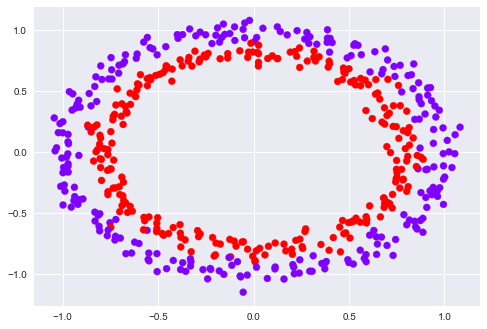

In [96]:
X,Y=make_circles(n_samples=500,  shuffle=True, noise=0.05, random_state=1, factor=0.8)
print(X.shape,Y.shape)

plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.get_cmap("rainbow"))

In [122]:
def softmax(a):
    exp_a=np.exp(a)
    exp_sum=np.sum(exp_a,axis=1,keepdims=True)
    return exp_a/exp_sum
def activation(x):
    #sigmoid function
    y=x
    y[x<0]=0
    return y
    return np.tanh(x)
    return 1/(1+np.exp(-x));
def activation_diff(x):
    # first differential of activation function
    """
    sigmoid'(x)=sigmoid(x)*(1-sigmoid(x))
    """
    y=x
    y[x<0]=0
    y[x>0]=1
    return y
    y=activation(x)
    return (1-np.square(y))
    sig=activation(x)
    return sig*(1-sig) # element wise multiplication
    
    

In [124]:
class NeuralNetwork:
    def __init__(self,input_size,output_size,hidden):
        np.random.seed(0)
        model={}# dictionary
        """
        input layer--(W1,B1)-->layer1--(W2,B2)-->layer2--(W3,B3)-->output layer
        """
        
        # from input layer to layer 1
        model['W1']=np.random.randn(input_size,hidden[0])
        model['B1']=np.zeros((1,hidden[0]))
        
        # from layer 1 to layer 2
        model['W2']=np.random.randn(hidden[0],hidden[1])
        model['B2']=np.zeros((1,hidden[1]))
        
        # from  layer 2 to output layer
        model['W3']=np.random.randn(hidden[1],output_size)
        model['B3']=np.zeros((1,output_size))
        
        """
        for x in model:
            print(x,model[x].shape)
        """
        self.model=model
    def forward_propagation(self,X):
        """
        X--> Matrix of size m X n where m is the no of examples and n=input_size
        """
        model=self.model
        W1,W2,W3=model['W1'],model['W2'],model['W3']
        b1,b2,b3=model['B1'],model['B2'],model['B3']
        
        z1=np.dot(X,W1)+b1
        a1=activation(z1)
        
        z2=np.dot(a1,W2)+b2
        a2=activation(z2)
        
        z3=np.dot(a2,W3)+b3
        a3=softmax(z3)
        #print(a3)
        #print(a3.sum(axis=1))
        self.activations=(a1,a2,a3,z1,z2,z3)
        return a3
        
    def backward_propagation(self,x,y,learning_rate=0.001):
        model=self.model
        W1,W2,W3=model['W1'],model['W2'],model['W3']
        b1,b2,b3=model['B1'],model['B2'],model['B3']
        (a1,a2,a3,z1,z2,z3)=self.activations
        
        
        delta3=a3-y
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)
        
        
        delta2=np.dot(delta3,W3.T)*(activation_diff(z2))
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)
        
        
        delta1=np.dot(delta2,W2.T)*(activation_diff(z1))
        dw1=np.dot(x.T,delta1)
        db1=np.sum(delta1,axis=0)
        
        # update
        self.model["W3"]-=learning_rate*dw3
        self.model["B3"]-=learning_rate*db3
        
        self.model["W2"]-=learning_rate*dw2
        self.model["B2"]-=learning_rate*db2
        
        self.model["W1"]-=learning_rate*dw1
        self.model["B1"]-=learning_rate*db1
        


    def predict(self,x):
        y_=self.forward_propagation(x)
        return np.argmax(y_,axis=1);
    def summary(self):
        model=self.model
        W1,W2,W3=model['W1'],model['W2'],model['W3']
        print(W1,W2,W3)
        
    def loss(self,y_oht,y_):
        return -np.mean(y_oht*np.log(y_))
        
        

        

In [125]:
# convert the simple labels into one hot vector
def convert_to_oht(y,no_of_classes):
    m=y.shape[0]
    y_oht=np.zeros((m,no_of_classes))
    y_oht[np.arange(m),y]=1
    return y_oht

def train(model,X,y,no_of_classes,epochs=200,learning_rate=0.0001,logs=True):
    y_oht=convert_to_oht(y,no_of_classes)
    losses=[]
    for i in range(epochs):
        y_=model.forward_propagation(X)
        l=model.loss(y_oht,y_)
        losses.append(l)
        print("Iteration {}, loss= {}".format(i,l))
        model.backward_propagation(X,y_oht,learning_rate)
    return losses
        

# Running the model

In [126]:
myModel=NeuralNetwork(2,2,[10,5])


In [127]:
losses=train(myModel,X,Y,2,500,0.001)

Iteration 0, loss= 0.4159374685343042
Iteration 1, loss= 0.420811536242065
Iteration 2, loss= 0.34928369194926945
Iteration 3, loss= 0.34301181582911217
Iteration 4, loss= 0.3388908595864516
Iteration 5, loss= 0.33598304400759516
Iteration 6, loss= 0.3336042320162489
Iteration 7, loss= 0.3315360688518622
Iteration 8, loss= 0.32976265784312725
Iteration 9, loss= 0.3281417298118051
Iteration 10, loss= 0.32661397478973503
Iteration 11, loss= 0.325142832080993
Iteration 12, loss= 0.3236771127516004
Iteration 13, loss= 0.3221849615968695
Iteration 14, loss= 0.32067009339112107
Iteration 15, loss= 0.31912958137726843
Iteration 16, loss= 0.31760750391516474
Iteration 17, loss= 0.3160649751062526
Iteration 18, loss= 0.3144475591960345
Iteration 19, loss= 0.312786980615953
Iteration 20, loss= 0.31108586264742244
Iteration 21, loss= 0.30934794629381135
Iteration 22, loss= 0.3075878571813104
Iteration 23, loss= 0.30576686189972113
Iteration 24, loss= 0.30390834211587886
Iteration 25, loss= 0.3019

Iteration 230, loss= 0.19743930250661698
Iteration 231, loss= 0.18269988151935565
Iteration 232, loss= 0.17963764220232623
Iteration 233, loss= 0.17605037904384224
Iteration 234, loss= 0.17683343547342883
Iteration 235, loss= 0.17874878537750089
Iteration 236, loss= 0.18593268121588505
Iteration 237, loss= 0.1966591007011508
Iteration 238, loss= 0.21664385763161345
Iteration 239, loss= 0.23486400659823925
Iteration 240, loss= 0.2590138787944028
Iteration 241, loss= 0.24663791853257316
Iteration 242, loss= 0.24065961542683265
Iteration 243, loss= 0.19808858542907762
Iteration 244, loss= 0.1784766739848467
Iteration 245, loss= 0.16205272087487935
Iteration 246, loss= 0.1526319664886591
Iteration 247, loss= 0.1472710905515267
Iteration 248, loss= 0.14455609302020284
Iteration 249, loss= 0.14411702958009648
Iteration 250, loss= 0.1467119303707076
Iteration 251, loss= 0.15231892849675024
Iteration 252, loss= 0.1649202674124017
Iteration 253, loss= 0.1798599000154026
Iteration 254, loss= 0.2

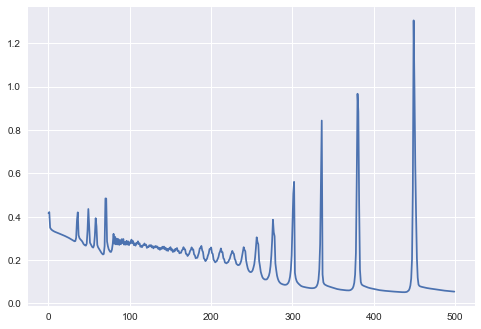

In [128]:
plt.plot(losses)

In [129]:
output=(myModel.predict(X))

In [130]:
np.mean(np.array(output==Y))

0.968

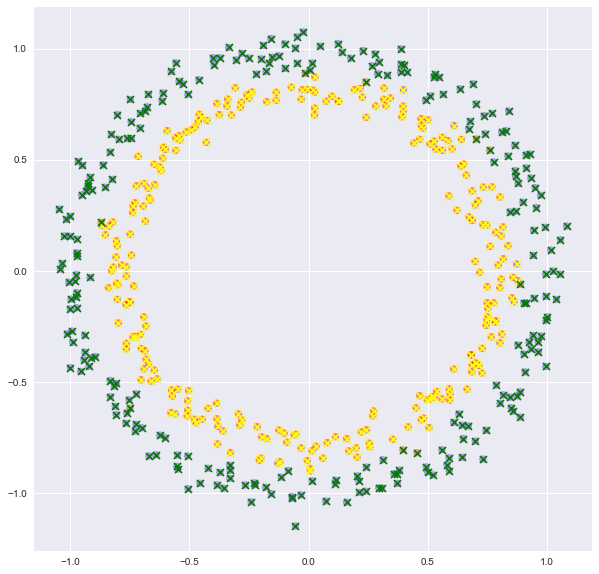

In [131]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.get_cmap("rainbow"),alpha=0.4)
plt.scatter(X[output==1][:,0],X[output==1][:,1],marker='x',color='yellow')
plt.scatter(X[output==0][:,0],X[output==0][:,1],marker='x',color='green')

plt.show()

[[0 1]
 [0 1]]
